### Game analysis: churn, virality, monetization

This Colab notebook demonstrates how to simulate the effect of churn and virality on one's playerbase and concludes with a monetization forecasting simulation for a hypothetical game company. The simulations start from simple and unrealistic, and gradually add components towards a more complex and realistic model. 

This notebook also serves as a tutorial on Python programming and data plotting for those only familiar with Unity & C#. For more Python learning resources, you can also see: https://github.com/PerttuHamalainen/MediaAI/blob/master/Lessons/Python.md

**Learning goals:** 
- Understanding how simple recursive dependencies can lead to exponential growth or decay. 
- Understanding how recurrent revenue (e.g., monetization through in-app purchases) and investing game revenue in user acquisition are vital in making a game company profitable.
- Preliminaries of Colab notebooks and Python. Although most game designers still use Excel/Google Sheets, Python has recently emerged as the de facto tool for data science and machine learning in games and other fields. Python can do the same as Excel, but scales better to complex simulations and the plain text variable make code more readable than spreadsheet formulas such as ```$I$6*D22/100+D24/$D$3+$D$10*$D$11*D22```. One can also use spreadsheets and Python together, pulling data from Google Sheets to Python and pushing simulation results back. In the end, one should use the tool that is most productive for oneself. For reference, [this Excel](https://github.com/PerttuHamalainen/GameAnalysis/raw/master/spreadsheets/monetization%20forecast.xlsx) provides a simulation similar to the final result of this notebook. 

**How to use:** Students should proceed section by section, reading the code and doing the exercises. Click on the triangle on the left of a section header to view the contents. I'm also assuming you've attended my intro lecture or at least checked the [lecture slides](https://raw.githubusercontent.com/PerttuHamalainen/GameAnalysis/master/lectures/gdmath_2020_part1.pdf).

*The exercises contain model solutions, but these are hidden by default. Think of this as **a puzzle game** and try to first complete the exercises without help.* 


### Getting started

Usually, every Colab notebook starts by importing some basic tools such as numpy (numerical computation such as linear algebra) and pyplot (data visualization). This is similar to C++ "include" or C# "using". Python also allows defining shorthand names for the packages using the "as" keyword. 

The packages contain useful utilities. For example, after the ```import matplotlib.pyplot as plt```, one can write ```plt.plot(data)``` to run the PyPlot package's ```plot``` function on the ```data``` argument passed into the function inside the parenthesis. The function assumes that data is a list or array of numbers (more on this later). 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Basic recursion 

First, let's write a very simple simulation of how each player might recruit new players virally, e.g., by sharing on social media. This is not a very realistic model, but we are keeping this simple so that those with less programming experience are not overwhelmed by complex code. We will add more complexity and realism later.

If you are new to Python, please check this [brief intro to Python syntax](https://raw.githubusercontent.com/PerttuHamalainen/GameAnalysis/master/lectures/IntroToPythonSyntax.pdf).


In [ ]:
#Simulation parameters: The initial number of players and the virality multiplier 
#that specifies how many new players each existing player recruits per day, on average. 
#You can choose these as you like. If you were using a simulation for making real-world 
#predictions, you would try to measure virality based on past data.
players=1000
virality=0.1

#Simulation loop
for i in range(20):
    players=players + virality*players
    print(players)

1100.0
1210.0
1331.0
1464.1
1610.51
1771.561
1948.7170999999998
2143.5888099999997
2357.947691
2593.7424601
2853.1167061099995
3138.4283767209995
3452.2712143930994
3797.4983358324093
4177.24816941565
4594.972986357216
5054.470284992937
5559.917313492231
6115.9090448414545
6727.4999493256


Let's do the same but practice formatting the printout in a bit more informative manner. The ```print``` function takes in a character string that is inside the " ". Python strings also provide the ```format``` method that can replace the ```{}``` inside the string with variables. 

For more information on Python string formatting, see: https://www.w3schools.com/python/ref_string_format.asp

In [ ]:
players=1000
virality=0.1
for i in range(20):
    players=players + virality*players
    print("Day {}, current players {}".format(i,players))

Day 0, current players 1100.0
Day 1, current players 1210.0
Day 2, current players 1331.0
Day 3, current players 1464.1
Day 4, current players 1610.51
Day 5, current players 1771.561
Day 6, current players 1948.7170999999998
Day 7, current players 2143.5888099999997
Day 8, current players 2357.947691
Day 9, current players 2593.7424601
Day 10, current players 2853.1167061099995
Day 11, current players 3138.4283767209995
Day 12, current players 3452.2712143930994
Day 13, current players 3797.4983358324093
Day 14, current players 4177.24816941565
Day 15, current players 4594.972986357216
Day 16, current players 5054.470284992937
Day 17, current players 5559.917313492231
Day 18, current players 6115.9090448414545
Day 19, current players 6727.4999493256


### Plotting

An alternative to printing out results is visualizing the data. For this, we define a Python list called "data" and add the player counts of each simulation step to the list. After this, one can simply call PyPlot's plt() function.

Text(0, 0.5, 'Players')

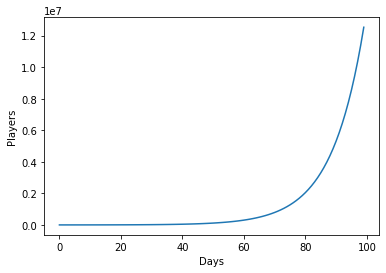

In [ ]:
#Parameters
players=1000
virality=0.1

#Empty Python list, simulation data will be added to this
data=[]

#Simulation loop 
for i in range(100):
    #store this day's player count for plotting
    data.append(players)
    #simulate
    players=players + virality*players
    
#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

### Exercise: Add simulation of churn, i.e., players quitting with some probability.

Add a code cell to type in the code. **Only click to show the model solution below after you've tried to implement the code yourself.**

Hint: you should be able to do this by copying the code above and making two changes: 1) add a line that defines a churnProbability (in range 0...1, denoting the percentage of churned players divided by 100), and subtract churned players from the current player count similar to how the virally recruited players are added.

####Solution (expand to show)


Text(0, 0.5, 'Players')

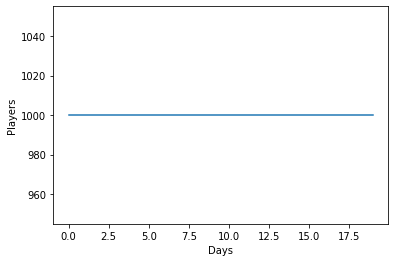

In [ ]:
#simulate
players=1000
virality=0.1
churnProbability=0.1
data=[]
for i in range(20):
    data.append(players)
    players=players + virality*players - churnProbability*players
#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

### Parameter sliders

To make adjusting the parameters a bit intuitive an visual, one can use the @param metadata. After changing a parameter's value, one must run the code again. The keyboard shortcut for that is ctrl+enter, but note that it requires that the input focus is on the code, i.e., you must click the code window after adjusting a slider. 

More examples: https://colab.research.google.com/notebooks/forms.ipynb 

Text(0, 0.5, 'Players')

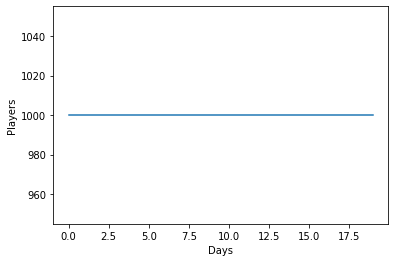

In [ ]:
#simulate
players=1000  #@param {type:"slider", min:0, max:1000, step:10}
virality=0.1 #@param {type:"slider", min:0.0, max:1.0}
churnProbability=0.1  #@param {type:"slider", min:0.0, max:1.0}
data=[]
for i in range(20):
    data.append(players)
    players=players + virality*players - churnProbability*players

#plot
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Players")

###Multiple plots
To show how the dynamics change with respect to some parameter, it can be useful to plot multiple curves together.

We do this by first moving the simulation code inside a function, and then calling the function with different values for the virality. We will see that in our model, the player count will stay constant if churnProbability=virality. This is a so-called tipping point at which the system flips between exponential growth and decay.

In Python, one defines functions with the "def" keyword, with a ":" after the function name and parameters.

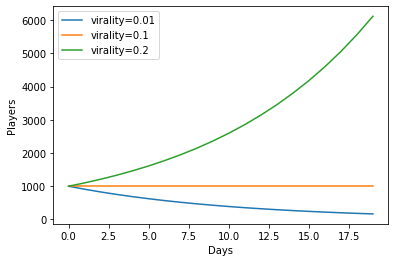

In [ ]:
#The simulation function
def simulate(virality):
    players=1000  
    churnProbability=0.1  
    data=[]
    for i in range(20):
        data.append(players)
        players=players + virality*players - churnProbability*players
    return data #we return the generated list of player counts

#For loop that runs multiple simulations.
#Instead of using the range() function, one can define
#the values looped through using a list
for virality in [0.01,0.1,0.2]:
    #Get the simulated player counts
    data=simulate(virality)
    #Plotted curves can have labels. We use .format() similar to the printouts above.
    plt.plot(data,label="virality={}".format(virality))

#plot
plt.xlabel("Days")
plt.ylabel("Players")
plt.legend() #this makes the labels visible

###Interaction

An alternative to the @param metadata is using @interact before a function definition. This adds user interface elements like sliders and the function is called whenever the user adjusts the slider.  

Note that the plotting is now inside the function so that the plot gets updated whenever the user adjusts the slider.

More examples can be found at https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb


In [ ]:
#We need an additional import for the interaction functionality
from ipywidgets import interact
#The @interact attribute, with three numbers defining the slider min, max, step
@interact(virality=(0,1,0.01))   
#The function definition, which also gives the slider initial value
def simulate(virality=0.1):      
    players=1000  
    churnProbability=0.1  
    data=[]
    for i in range(20):
        data.append(players)
        players=players + virality*players - churnProbability*players
    plt.plot(data)
    plt.xlabel("Days")
    plt.ylabel("Players")



interactive(children=(FloatSlider(value=0.1, description='virality', max=1.0, step=0.01), Output()), _dom_clas…

### Simulate game monetization and company cashflow

Let's now expand the simulation to game monetization. We implement revenue per user, modeling the average income from both in app purchases and game purchases. Read and understand the code below, then proceed to the exercises where you'll modify the simulation to be more realistic. For now, it can provide some quite unrealistic results.


Text(0, 0.5, 'Money')

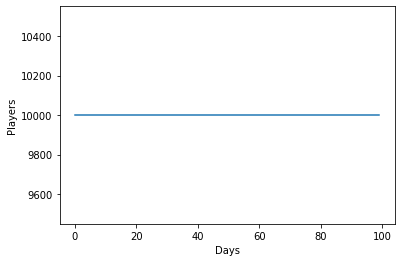

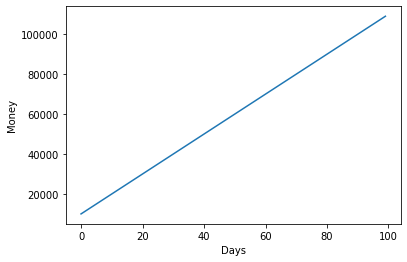

In [ ]:
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1 #this is our user acquisition cost
virality=0.1
churnProbability=0.1
dailyRevenuePerPlayer=0.1
gamePrice=0

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(100):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    newPlayers=virality*players 
    churnedPlayers=churnProbability*players

    #Update monetization
    money+=players*dailyRevenuePerPlayer
    money+=gamePrice*newPlayers

    #Update player count
    players=players + newPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")

###Exercise: Implement personnel costs

Add parameters: Number of employees, monthly salary (divide by 21 to get daily salary), employer auxiliary cost multiplier, and employer overheads multiplier (rent, computers, software). Update the money calculations accordingly. Add a new code cell and copy-paste the simulation code above to get started. 

For the auxiliary cost multiplier, you can use 1.36 (https://www.businessfinland.fi/en/do-business-with-finland/invest-in-finland/business-environment/cost-calculator). For overheads, a realistic multiplier is somewhere around 1.5 or 2.0.

If you start the simulation with churnProbability=virality, you can now see how the company is making a steady loss. However, your should see that if one manages to increase virality even a bit, the initial loss will turn into exponentially increasing profits. In practice, though, achieving such virality is very hard. 

####Solution (expand to show)

Monthly burn: 28560.0
Daily burn: 1360.0


Text(0, 0.5, 'Money')

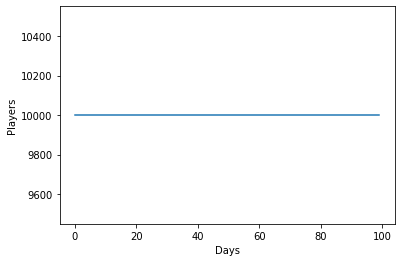

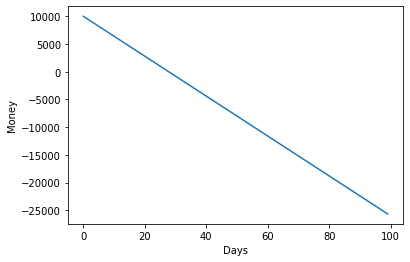

In [ ]:
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1
virality=0.1
churnProbability=0.1
dailyRevenuePerPlayer=0.1
employees=4
monthlySalary=3500
auxiliaryMultiplier=1.36
overheadsMultiplier=1.5
gamePrice=0

#Compute and print monthly and daily burn
monthlyBurn=employees*monthlySalary*auxiliaryMultiplier*overheadsMultiplier
dailyBurn=monthlyBurn/21
print("Monthly burn:",monthlyBurn)
print("Daily burn:",dailyBurn)

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(100):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    newPlayers=virality*players 
    churnedPlayers=churnProbability*players

    #Update monetization
    money+=players*dailyRevenuePerPlayer
    money+=gamePrice*newPlayers
    money-=dailyBurn

    #Update player count
    players=players + newPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")

###Exercise: Invest revenue in user acquisition

Add a parameter that defines the percentage of revenue that is invested in user acquisition. You should see that this is the key to make exponentially growing profits even if the game is not viral, but if each player provides some revenue.

This is basically what companies try to estimate when soft-launching games: Measure retention, virality, and average revenue per user on a small market to gain evidence of exponential growth potential and that the game or company is worth investing in, and even if the company will make some loss in the short term, it will be profitable in the long term.


####Solution (expand to show)

Monthly burn: 28560.0
Daily burn: 1360.0


Text(0, 0.5, 'Money')

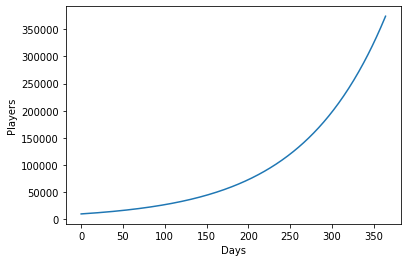

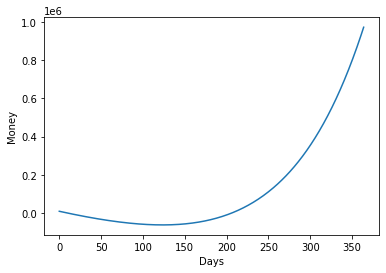

In [ ]:
#Define simulation parameters
initialMarketingBudget=10000
money=20000 
pricePerUser=1
virality=0.0
churnProbability=0.05
dailyRevenuePerPlayer=0.1
employees=4
monthlySalary=3500
auxiliaryMultiplier=1.36
overheadsMultiplier=1.5
gamePrice=0
userAcquisitionPercentage=60

#Compute and print monthly and daily burn
monthlyBurn=employees*monthlySalary*auxiliaryMultiplier*overheadsMultiplier
dailyBurn=monthlyBurn/21
print("Monthly burn:",monthlyBurn)
print("Daily burn:",dailyBurn)

#Compute initial values: Buy some initial players
players=initialMarketingBudget/pricePerUser
money-=initialMarketingBudget
money+=players*gamePrice  #if the game price >0, the initial players also bring some revenue

#Lists for results
playerCounts=[]
moneyAmounts=[]

#Simulate
for i in range(365):
    #Store results
    moneyAmounts.append(money)
    playerCounts.append(players)

    #Now, we explicitly compute new and churned players
    #and store them into variables, as we need them
    #for the monetization calculation 
    viralPlayers=virality*players 
    churnedPlayers=churnProbability*players

    #Update monetization and user acquisition
    revenue=players*dailyRevenuePerPlayer+gamePrice*viralPlayers
    userAcquisitionBudget=revenue*userAcquisitionPercentage/100
    money=money+revenue-dailyBurn-userAcquisitionBudget
    acquiredPlayers=userAcquisitionBudget/pricePerUser


    #Update player count
    players=players + acquiredPlayers + viralPlayers - churnedPlayers

#plot players over time
plt.plot(playerCounts)
plt.xlabel("Days")
plt.ylabel("Players")

#plot money over time
plt.figure()  #create new plot
plt.plot(moneyAmounts)
plt.xlabel("Days")
plt.ylabel("Money")

###Exercise: Simulate your own company and game

Set up the simulation parameters so that they are realistic for a company that you might found with some fellow students. Can you find a plausible way to stay alive? Do you have to monetize through ads or in app purchases, or is the business viable with paid games? (Tip: minimizing burn rate is essential - for example, it might be good work with free software and no rented office space, at least initially.) 

Note that if your game only has a single "remove ads" purchase, you need to modify the simulation code a bit.